# Association Rules Q1 Book


Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  
2) Change the minimum length in apriori algorithm  
3) Visulize the obtained rules using different plots  

# 1. Import Libs 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

# 2. Import Data 

In [85]:
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [127]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [128]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

### here, Data preprocessing is  not required as it is already in encoded format

# 3. Model Building 

## Apriorri Alogrithm

### 1. Association rules with 10% Support and 70% confidence 

#### 1.1 With 10% Support 

In [103]:

frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


#### 1.2 with 70% confidence 

In [87]:
association_1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
association_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


###  Here, we got best associate value by removing redundent rules. 


## visualization  

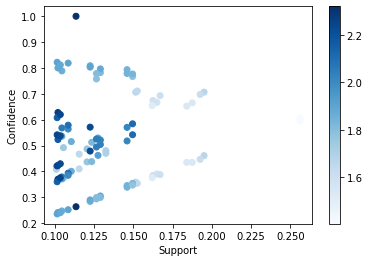

In [101]:
plt.scatter(association_1['support'],association_1['confidence'],c= association_1['lift'], cmap = 'Blues')
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

Text(0.5, 0, 'lift')

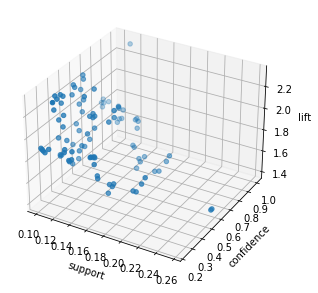

In [98]:
ax1 = plt.figure(figsize=(10,5)).add_subplot(111 ,projection = '3d')
ax1.scatter(association_1['support'],association_1['confidence'],association_1['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

### 2. Association rules with 15% Support and 60% confidence 

#### 2.1 With 15% Support 

In [119]:
frequent_itemsets2=apriori(book,min_support=0.15,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


#### 2.2 With 60% confidence 

In [120]:
association_2 =association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
association_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


## Visulization

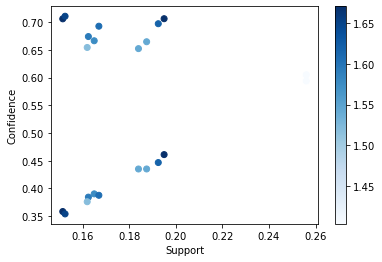

In [121]:
plt.scatter(association_2['support'],association_2['confidence'],c= association_2['lift'], cmap = 'Blues')
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()  

Text(0.5, 0, 'lift')

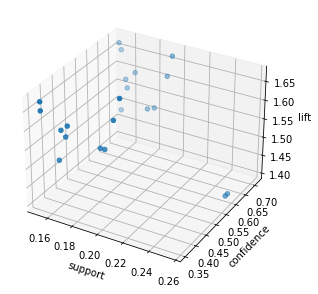

In [122]:
ax2 = plt.figure(figsize=(10,5)).add_subplot(111 ,projection = '3d')
ax2.scatter(association_2['support'],association_2['confidence'],association_2['lift'])
ax2.set_xlabel("support")
ax2.set_ylabel("confidence")
ax2.set_zlabel("lift")

### 3. Association rules with 5% Support and 80% confidence 

#### 3.1 With 5% Support 

In [123]:
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, GeogBks, CookBks, YouthBks)"
96,0.0560,"(GeogBks, CookBks, ArtBks, YouthBks)"
97,0.0650,"(GeogBks, CookBks, ArtBks, DoItYBks)"
98,0.0510,"(YouthBks, GeogBks, CookBks, DoItYBks, ChildBks)"


#### 3.2 With 80% confidence 

In [124]:
association_3 = association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
association_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ChildBks, CookBks, ArtBks, DoItYBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(GeogBks, ChildBks, ArtBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(GeogBks, ChildBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(DoItYBks),"(GeogBks, ChildBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


## Visulization

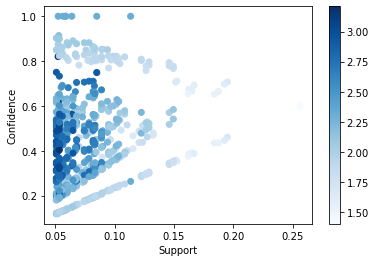

In [125]:
plt.scatter(association_3['support'],association_3['confidence'],c= association_3['lift'], cmap = 'Blues')
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

Text(0.5, 0, 'lift')

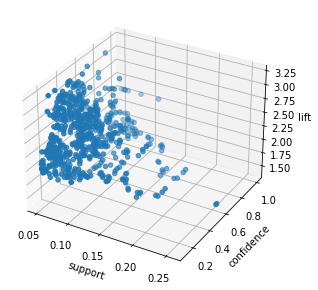

In [126]:
ax3 = plt.figure(figsize=(10,5)).add_subplot(111 ,projection = '3d')
ax3.scatter(association_3['support'],association_3['confidence'],association_3['lift'])
ax3.set_xlabel("support")
ax3.set_ylabel("confidence")
ax3.set_zlabel("lift")

# END 